
Importando modulos necesario


In [ ]:
import torch 
import numpy as np
# modulos de redes neuronales 
import torch.nn as nn
# modulo de optimizaciones
import torch.optim as optim

import matplotlib.pyplot as plt



Regresion Lineal


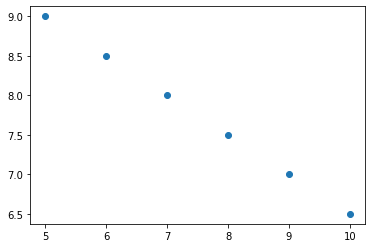

In [ ]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [9, 8.5, 8, 7.5, 7, 6.5]

plt.scatter(car_prices, units_sold)


In [ ]:
# haciendo reshape con numpy para poder convertirlo a tensor
prices_array = np.array(car_prices).reshape(-1, 1)
units_array = np.array(units_sold).reshape(-1, 1)
prices_array, units_array

(array([[ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]), array([[9. ],
        [8.5],
        [8. ],
        [7.5],
        [7. ],
        [6.5]]))

In [ ]:
# el tensor sufre modificacion con gradientes activados
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
# no necesita los gradientes por que es mi target(explicacion)
units = torch.from_numpy(units_array).float()
print(prices)
print(prices.shape)

tensor([[ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]], requires_grad=True)
torch.Size([6, 1])


0.019778423011302948


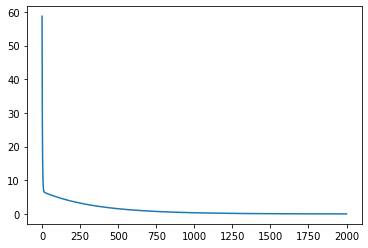

In [ ]:
# recibe la dimension como para la entrada como para la salida
model = nn.Linear(1, 1)

# implementacion de modelo
# Model Media de el cuadrado de los errores
loss_function = nn.MSELoss()
# optimizador Stocastic gradient decent 
# parametros son los pesos lr=> learning rate
optimizer = optim.SGD(model.parameters(), lr=0.015)

# iternado el modelo para aprendizaje
losses = []
iterations = 2000
for i in range(iterations):
  # prediccion
  pred = model(prices)
  # perdida (prediccion, target real)
  loss = loss_function(pred, units)
  losses.append(loss.data)
  # reinicas gradientes
  optimizer.zero_grad()
  # moviendo nuestra prediccion
  loss.backward()
  optimizer.step()

print(float(loss))
plt.plot(range(iterations), losses)

In [ ]:
# creando el tensor para implementar modelo con precios
x = torch.Tensor([[20.0]])

p = model(x)
p

tensor([[2.4723]], grad_fn=<AddmmBackward>)